In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def extract_dataset_parts(row):
   if row["dataset"].endswith("zero_shot") or row["dataset"].endswith("rag"):
      row["dataset"] = row["dataset"] +"_0"
   parts = row["dataset"].split("_")
   generation = "_".join(parts[2:-1])
   row["dataset_model"] = parts[0]
   row["dataset_temperature"] = parts[1]
   row["dataset_generation_mode"] = "no_rag" if generation == "zero_shot" or generation == "few_shot" else "rag"
   row["dataset_examples_per_class"] = parts[-1]
   return row

In [3]:
def create_experiment(row):
    row['experiment'] = row['model_name']+'_'+str(row['temperature'])+'_'+row['generation_mode']+'_'+str(row['examples_per_class'])
    return row


In [4]:
file = "/workspaces/RAG_secure_code_generation/test_results_synth.csv"

In [5]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,top_k,dataset,accuracy,accuracy_diff,dataset_index,task,template,prompt_parameters,model_name,generation_mode,examples_per_class,temperature,seed
0,0,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,0,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156
1,1,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.834594,0.144991,1,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156
2,2,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,2,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156
3,3,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.513043,0.466541,3,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156
4,4,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.836484,0.143100,4,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156


In [6]:
df = df.apply(extract_dataset_parts, axis=1)
df.head()

,Unnamed: 0,top_k,dataset,accuracy,accuracy_diff,dataset_index,task,template,prompt_parameters,model_name,generation_mode,examples_per_class,temperature,seed,dataset_model,dataset_temperature,dataset_generation_mode,dataset_examples_per_class
0,0,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,0,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
1,1,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.834594,0.144991,1,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
2,2,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,2,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
3,3,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.513043,0.466541,3,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
4,4,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.836484,0.143100,4,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag_few_shot,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3


In [7]:
df['generation_mode'] = df['generation_mode'].replace('rag_few_shot', 'rag')
df['generation_mode'] = df['generation_mode'].replace('zero_shot', 'no_rag')
df['generation_mode'] = df['generation_mode'].replace('few_shot', 'no_rag')
df.head()

,Unnamed: 0,top_k,dataset,accuracy,accuracy_diff,dataset_index,task,template,prompt_parameters,model_name,generation_mode,examples_per_class,temperature,seed,dataset_model,dataset_temperature,dataset_generation_mode,dataset_examples_per_class
0,0,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,0,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
1,1,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.834594,0.144991,1,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
2,2,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,2,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
3,3,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.513043,0.466541,3,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3
4,4,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.836484,0.143100,4,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3


In [8]:
df = df.apply(create_experiment, axis=1)
df.head()

,Unnamed: 0,top_k,dataset,accuracy,accuracy_diff,dataset_index,task,template,prompt_parameters,model_name,generation_mode,examples_per_class,temperature,seed,dataset_model,dataset_temperature,dataset_generation_mode,dataset_examples_per_class,experiment
0,0,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,0,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3,gpt-3.5-turbo-0125_0.5_rag_3
1,1,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.834594,0.144991,1,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3,gpt-3.5-turbo-0125_0.5_rag_3
2,2,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.977505,0.002079,2,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3,gpt-3.5-turbo-0125_0.5_rag_3
3,3,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.513043,0.466541,3,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3,gpt-3.5-turbo-0125_0.5_rag_3
4,4,1,gpt-3.5-turbo-0125_1.0_rag_few_shot_3,0.836484,0.143100,4,detect_xss_simple_prompt,create_function_readable,empty,gpt-3.5-turbo-0125,rag,3,0.5,156,gpt-3.5-turbo-0125,1.0,rag,3,gpt-3.5-turbo-0125_0.5_rag_3


In [9]:
df.iloc[0].experiment

'gpt-3.5-turbo-0125_0.5_rag_3'

In [10]:
def get_winner(df, criterion, query_on_functions = None):
    if query_on_functions is not None:
        df = df.query(query_on_functions)
    #get all the values of the criterion column
    values = df[f"dataset_{criterion}"].unique()
    new_df = pd.DataFrame(columns = ["experiment", criterion, "acc_diff"])
    results = {}
    for value in values:
        results[value] = 0
    for exp in df["experiment"].unique():
        exp_results = {}
        exp_df = df.query(f"experiment == '{exp}'")
        for value in values:
            exp_results[value] = exp_df.query(f"dataset_{criterion} == '{value}'")["accuracy_diff"].mean()
        #get the key with the lower acc diff in exp_results
        best_key = min(exp_results, key=exp_results.get)
        new_row = {"experiment":exp,
                   criterion:best_key,
                   "acc_diff":exp_results[best_key]}
        new_df = pd.concat([new_df, pd.DataFrame(new_row, index=[1])])
        results[best_key] += 1
    return results, new_df

In [11]:
param = "temperature"
winners, new_df = get_winner(df, param,query_on_functions = "model_name =='gpt-4-0125-preview' or model_name =='gpt-4-1106-preview'")
winners, new_df.head()

/tmp/ipykernel_1073509/2651482877.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, pd.DataFrame(new_row, index=[1])])


({'1.0': 36, '0.5': 3, '0.0': 9},
                      experiment temperature  acc_diff
 1  gpt-4-0125-preview_0.5_rag_3         1.0  0.077588
 1  gpt-4-0125-preview_0.0_rag_3         1.0  0.066773
 1  gpt-4-0125-preview_1.0_rag_3         1.0  0.069738
 1  gpt-4-0125-preview_0.5_rag_1         0.0  0.061788
 1  gpt-4-0125-preview_0.0_rag_1         1.0  0.082716)

In [12]:
"1.0".isnumeric()

False

In [13]:
df["temperature"].unique()

array([0.5, 0. , 1. ])

In [16]:
new_df

{'1.0': 36, '0.5': 3, '0.0': 9}

In [19]:
new_df["temperature"].unique()

array(['1.0', '0.0', '0.5'], dtype=object)

In [21]:
criterion_values = list(filter(lambda x: x in new_df["temperature"].unique(),["0.0", "0.5", "1.0"]))
criterion_values

['0.0', '0.5', '1.0']

/tmp/ipykernel_874026/2236231045.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=new_df, x=param, palette = "hls")


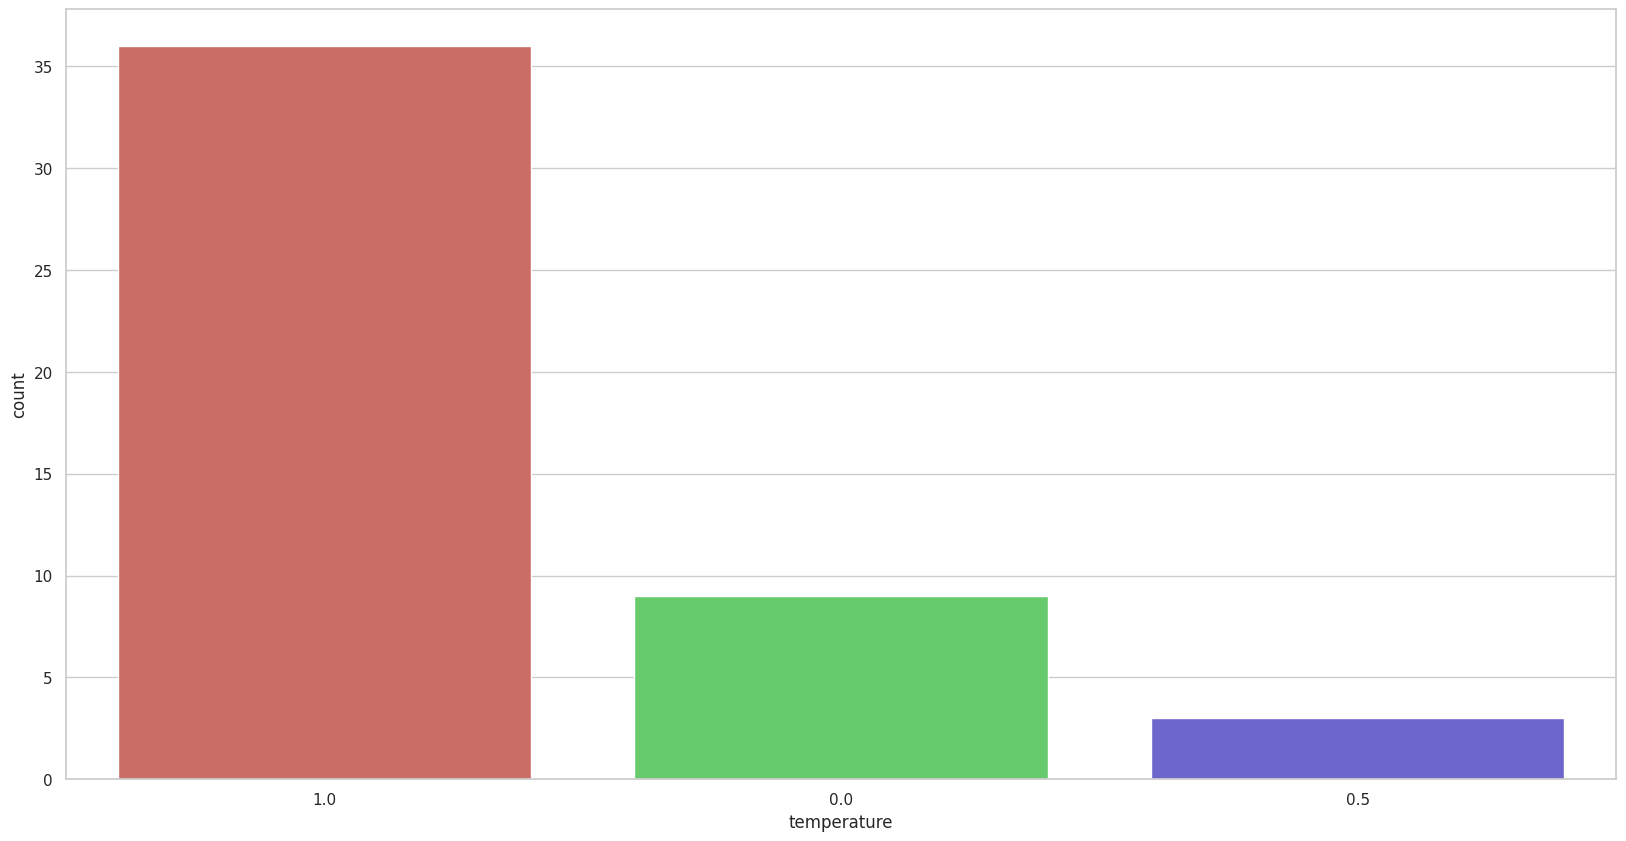

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
criterion_values = new_df[param].unique()
#check if all of them are digits
if all([c.isnumeric() for c in criterion_values]):
    criterion_values = [int(c) for c in criterion_values]
    #order them
    criterion_values.sort()
    ax = sns.countplot(data=new_df, x=param, order = criterion_values, palette = "hls")
elif(param == "temperature"):
    criterion_values = ["0.0", "0.5", "1.0"]
    ax = sns.countplot(data=new_df, x=param, order = criterion_values, palette = "hls")

else:
    ax = sns.countplot(data=new_df, x=param, palette = "hls")

In [14]:
criterion_values

array(['1.0', '0.0', '0.5'], dtype=object)

In [15]:
pd.DataFrame(winners, index=[0])[list(map(lambda x:str(x),criterion_values))]

,1.0,0.0,0.5
0,36,9,3
